# Libraries

In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  RandomizedSearchCV
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import joblib
import os

# Loading the Processed Data

In [8]:
X_train = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_train.csv')
X_test = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_test.csv')
y_train = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_train.csv')['Class']
y_test = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_test.csv')['Class']

# OverSampling/UnderSampling

In [5]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [6]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Training

In [42]:
datasets = [
    ('original', X_train, y_train),
    ('smote', X_train_smote, y_train_smote),
    ('undersampled', X_train_under, y_train_under)
]
model = LogisticRegression()

param_dict = [
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [600, 800, 1000],
        'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:100}]
    },
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [600, 800, 1000],
        'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:100}]
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [600, 800, 1000],
        'class_weight': ['balanced', {0:1, 1:10}, {0:1, 1:100}]
    }
]


LogisticRegression()

In [43]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dict, cv=5, n_jobs=-1,scoring='f1',n_iter=50)

for dataset_name,feature_set,target_set in datasets:
    print('training model with',dataset_name,'dataset...')
    random_search.fit(feature_set, target_set)
    best_model = random_search.best_estimator_
    print(random_search.best_params_)
    model_name = 'logistic_'+dataset_name+'.joblib'
    joblib.dump(best_model, model_name)
    print('model',model_name,'saved.')

training model with original dataset...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'class_weight': {0: 1, 1: 10}, 'C': 0.01}
model logistic_original.joblib saved.
training model with smote dataset...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 600, 'class_weight': 'balanced', 'C': 100}
model logistic_smote.joblib saved.
training model with undersampled dataset...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 600, 'class_weight': 'balanced', 'C': 10}
model logistic_undersampled.joblib saved.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
results = []
for dataset_name,_,_ in datasets:
        model_name = 'logistic_'+dataset_name+'.joblib'
        model = joblib.load(model_name)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        results.append({
                'dataset': dataset_name,
                'precision': precision,
                'f1_score': f1
            })
        print(f"\nMetrics for dataset: {dataset_name}")
        print(f"Precision: {precision:.4f}")
        print(f"F1-Score: {f1:.4f}")


Metrics for dataset: original
Precision: 0.6413
F1-Score: 0.6982

Metrics for dataset: smote
Precision: 0.0440
F1-Score: 0.0839

Metrics for dataset: undersampled
Precision: 0.0334
F1-Score: 0.0644


Loaded model: logistic_undersampled.joblib
Metrics for undersampled: Precision=0.033, Recall=0.870, F1=0.064
Loaded model: logistic_smote.joblib
Metrics for smote: Precision=0.044, Recall=0.883, F1=0.084
Loaded model: logistic_original.joblib
Metrics for original: Precision=0.641, Recall=0.766, F1=0.698


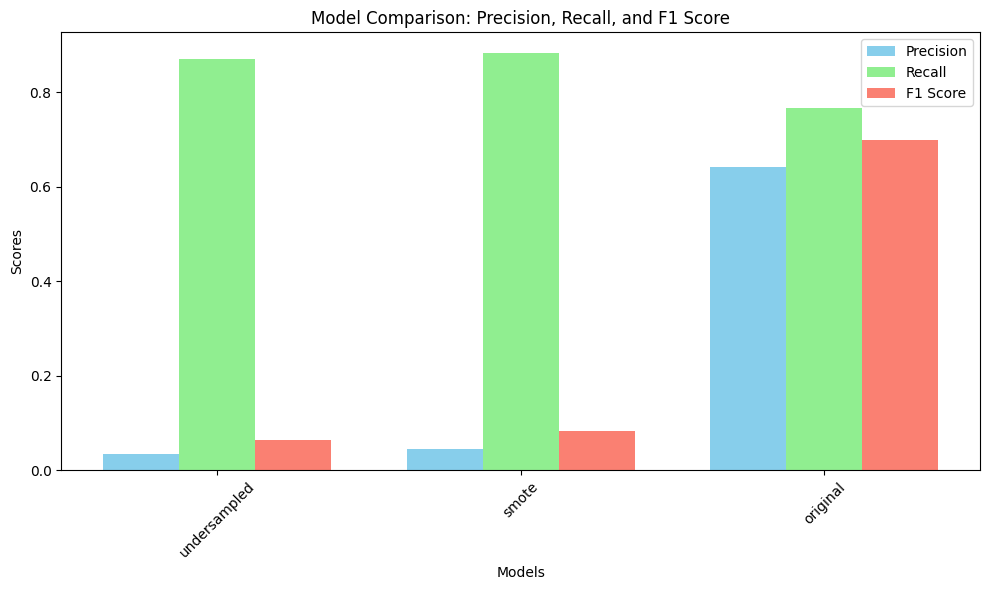

In [16]:
model_names = []
precisions = []
recalls = []
f1_scores = []

model_files = [f for f in os.listdir() if f.startswith('logistic_') and f.endswith('.joblib')]
for model_file in model_files:
    model_name = model_file.replace('logistic_', '').replace('.joblib', '')

    try:
        model = joblib.load(model_file)
        print(f'Loaded model: {model_file}')
    except Exception as e:
        print(f'Error loading {model_file}: {e}')
        continue

    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    model_names.append(model_name)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Metrics for {model_name}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}')

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(model_names))

plt.bar(index, precisions, bar_width, label='Precision', color='skyblue')
plt.bar(index + bar_width, recalls, bar_width, label='Recall', color='lightgreen')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Precision, Recall, and F1 Score')
plt.xticks(index + bar_width, model_names, rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('model_comparison.png')
plt.show()